<a href="https://colab.research.google.com/github/Helios109/Verylimitedtoystore/blob/main/COMPLETE_of_Complex_Linear_Regression_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

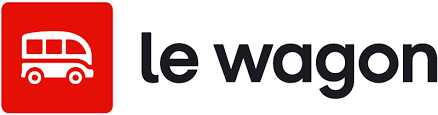

# Predicting house prices

In this challenge, you'll be using your newly acquired Linear Regression skills to try **to predict house prices in Ames, Iowa!**

You'll have to do some more complex preprocessing and when you try to model, things might not go your way...

**Let's get started!**

## Import the Data

Start by importing the data from this link!

[`Iowa_housing_prices.csv`](https://drive.google.com/file/d/1YgFv1_0-xl0blchMvhtUev4vzYX0BFGs/view?usp=sharing)

Load it into a dataframe!

In [14]:
!pip install gdown
import gdown
import pandas as pd

# Download the Google Sheets data #
url = 'https://drive.google.com/uc?id=1YgFv1_0-xl0blchMvhtUev4vzYX0BFGs'
output = 'house_prices.csv'
gdown.download(url, output, quiet=False)

# Load the data into a DataFrame #
house_prices_df = pd.read_csv('house_prices.csv')

# Display the first few rows of the DataFrame #
house_prices_df.head()


Downloading...
From: https://drive.google.com/uc?id=1YgFv1_0-xl0blchMvhtUev4vzYX0BFGs
To: /content/house_prices.csv
100%|██████████| 461k/461k [00:00<00:00, 30.5MB/s]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Cleaning

### Handle NA values

Unlike the previous challenge, this dataset has not been cleaned!

Most important thing to take care of are NA values!

Which columns have missing values?

In [15]:
# Check for missing values in each column #
missing_values = house_prices_df.isnull().sum()

# Display columns with missing values and their respective counts #
print("Columns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


### To drop or to fill?

Some columns miss many more values than others!

Drop columns that have more than 30% missing values and fill the others with the mean strategy!

In [16]:
# Calculate the threshold for dropping columns with more than 30% missing values #
threshold = 0.3 * len(house_prices_df)

# Drop columns with more than 30% missing values #
house_prices_df.dropna(axis=1, thresh=threshold, inplace=True)

# Identify numeric columns #
numeric_columns = house_prices_df.select_dtypes(include='number').columns

# Fill missing values in numeric columns with the mean strategy #
house_prices_df[numeric_columns] = house_prices_df[numeric_columns].fillna(house_prices_df[numeric_columns].mean())

# Display the updated DataFrame #
print(house_prices_df.head())




   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0    

At this stage, if you check for NaN values, you'll still find some, particularly in categorical features. You have the option to either drop these features or proceed with preprocessing to handle them.

In [70]:
# Check for any remaining NaN values in the DataFrame #
remaining_nan = house_prices_df.isnull().any()

# Display columns with remaining NaN values #
print("Columns with remaining NaN values:")
print(remaining_nan[remaining_nan])


Columns with remaining NaN values:
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
GarageType      True
GarageFinish    True
GarageQual      True
GarageCond      True
dtype: bool


In [71]:
# Count the number of NaN values in each column with remaining NaN values #
nan_counts = house_prices_df[['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                              'BsmtFinType1', 'BsmtFinType2', 'Electrical',
                              'FireplaceQu', 'GarageType', 'GarageFinish',
                              'GarageQual', 'GarageCond']].isnull().sum()

# Display the counts of NaN values in each column #
print("Number of NaN values in each column:")
print(nan_counts)


KeyError: "['MasVnrType', 'FireplaceQu'] not in index"

In [19]:
# Drop columns with a significant number of missing values #
columns_to_drop = ['MasVnrType', 'FireplaceQu']
house_prices_df.drop(columns_to_drop, axis=1, inplace=True)


In [37]:
# Count the number of columns left in the DataFrame #
num_columns_left = house_prices_df.shape[1]

# Display the number of columns left #
print("Number of columns left:", num_columns_left)

# List the remaining column names #
remaining_columns = house_prices_df.columns.tolist()

# Display the remaining column names #
print("Remaining column names:")
print(remaining_columns)



Number of columns left: 75
Remaining column names:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolAr

## Picking X and y

After cleaning, we are left with 76 columns/features. That's a lot to choose from! If we were experts in real estate, we could use our domain knowledge and pick out features we know are important!

However, we're not taking that approach today. We'll use all of the features to try to reach a prediction, all 76 of them!

Assign `X` and `y` appropriately! Keep in mind that we are trying to predict house prices!

In [39]:
# Assign X and y appropriately #
X = house_prices_df.drop(columns=['SalePrice'])
y = house_prices_df['SalePrice']


### Train test split
As always, we need to split the data into train and test!

In [40]:
from sklearn.model_selection import train_test_split #

# Split the data into training and testing sets (80% train, 20% test) #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets #
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1168, 74)
Shape of X_test: (292, 74)
Shape of y_train: (1168,)
Shape of y_test: (292,)


## Normalization

We can't skip this step! However, unlike the previous challenge, we now have non-numeric columns as well that we need to take care of!

**Non-numeric & Numerical Values**

Now let's try to do the same for the non-numeric columns! Use select_dtypes again and maybe change that include to something else? Have a look at the documentation!

After you've selected the non-numeric columns, use OneHotEncoder to encode the data!

In [64]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define the preprocessing steps for numerical and categorical features #
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features #
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the data #
X_train_normalized = preprocessor.fit_transform(X_train)
X_test_normalized = preprocessor.transform(X_test)


Have a look at your encoded columns.

In [65]:
# Get the transformed feature names from OneHotEncoder #
encoded_columns = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric and encoded categorical feature names #
all_feature_names = list(numeric_features) + list(encoded_columns)

# Print the encoded columns #
print(encoded_columns)



['MSZoning_C (all)' 'MSZoning_FV' 'MSZoning_RH' 'MSZoning_RL'
 'MSZoning_RM' 'Street_Grvl' 'Street_Pave' 'LotShape_IR1' 'LotShape_IR2'
 'LotShape_IR3' 'LotShape_Reg' 'LandContour_Bnk' 'LandContour_HLS'
 'LandContour_Low' 'LandContour_Lvl' 'Utilities_AllPub' 'Utilities_NoSeWa'
 'LotConfig_Corner' 'LotConfig_CulDSac' 'LotConfig_FR2' 'LotConfig_FR3'
 'LotConfig_Inside' 'LandSlope_Gtl' 'LandSlope_Mod' 'LandSlope_Sev'
 'Neighborhood_Blmngtn' 'Neighborhood_Blueste' 'Neighborhood_BrDale'
 'Neighborhood_BrkSide' 'Neighborhood_ClearCr' 'Neighborhood_CollgCr'
 'Neighborhood_Crawfor' 'Neighborhood_Edwards' 'Neighborhood_Gilbert'
 'Neighborhood_IDOTRR' 'Neighborhood_MeadowV' 'Neighborhood_Mitchel'
 'Neighborhood_NAmes' 'Neighborhood_NPkVill' 'Neighborhood_NWAmes'
 'Neighborhood_NoRidge' 'Neighborhood_NridgHt' 'Neighborhood_OldTown'
 'Neighborhood_SWISU' 'Neighborhood_Sawyer' 'Neighborhood_SawyerW'
 'Neighborhood_Somerst' 'Neighborhood_StoneBr' 'Neighborhood_Timber'
 'Neighborhood_Veenker' 'Conditi

### Recreate X
Recreate `X` now by combining (concatenating) the numeric and non-numeric normalized columns together! Call it `X_normalized`!

In [76]:
import pandas as pd

# Convert arrays to DataFrames
df_train_normalized = pd.DataFrame(X_train_normalized)
df_test_normalized = pd.DataFrame(X_test_normalized)

# Check for duplicated columns
duplicated_columns = df_train_normalized.columns[df_train_normalized.columns.duplicated()]
print("Duplicated Columns:", duplicated_columns)

# Check for missing columns in X_test_normalized
missing_columns = set(df_train_normalized.columns) - set(df_test_normalized.columns)
print("Missing Columns in X_test_normalized:", missing_columns)

# Check for missing columns in X_train_normalized
missing_columns = set(df_test_normalized.columns) - set(df_train_normalized.columns)
print("Missing Columns in X_train_normalized:", missing_columns)



Duplicated Columns: Index([], dtype='int64')
Missing Columns in X_test_normalized: set()
Missing Columns in X_train_normalized: set()


In [85]:
# Print data types #
print("Data type of X_train_normalized:", X_train_normalized.dtype)
print("Data type of X_test_normalized:", X_test_normalized.dtype)

# Print first few rows #
print("First few rows of X_train_normalized:")
print(X_train_normalized[:5])

print("First few rows of X_test_normalized:")
print(X_test_normalized[:5])



Data type of X_train_normalized: float64
Data type of X_test_normalized: float64
First few rows of X_train_normalized:
  (0, 0)	-1.1192840216867437
  (0, 1)	-0.8667643047469886
  (0, 2)	-0.012881785906024708
  (0, 3)	-0.21289571021689285
  (0, 4)	-0.8204445578548297
  (0, 5)	0.37221730085603477
  (0, 6)	-0.4554689634533773
  (0, 7)	-1.3460630279925625
  (0, 8)	-0.6015287346472784
  (0, 9)	1.0372686113776926
  (0, 10)	-0.28550406121847727
  (0, 11)	-0.40028164505613256
  (0, 12)	0.5726121928947197
  (0, 13)	0.3742352301895073
  (0, 14)	-0.8019229244046748
  (0, 15)	-0.11899866377895676
  (0, 16)	-0.40709314807972335
  (0, 17)	1.1053195824048596
  (0, 18)	-0.24287002311294137
  (0, 19)	-1.0555657250367967
  (0, 20)	-0.7640975231923183
  (0, 21)	0.13621832007914325
  (0, 22)	-0.2127571124887476
  (0, 23)	-0.9645659090752412
  (0, 24)	-0.9585921495629545
  :	:
  (4, 118)	1.0
  (4, 124)	1.0
  (4, 133)	1.0
  (4, 159)	1.0
  (4, 164)	1.0
  (4, 169)	1.0
  (4, 170)	1.0
  (4, 179)	1.0
  (4, 183)	

### Try a Linear Regression

Let's try to use a Linear Regression to model house prices!
Instantiate and fit a model!

In [86]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model #
model = LinearRegression()

# Fit the model on the training data #
model.fit(X_train_normalized, y_train)


LinearRegression()

### Calculate the MAE

Let's now calculate the mean absolute error of the model on the test set.

In [87]:
from sklearn.metrics import mean_absolute_error

# Predict house prices on the test set #
y_pred = model.predict(X_test_normalized)

# Calculate the mean absolute error #
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE) on test data:", mae)


Mean Absolute Error (MAE) on test data: 18370.9519370569


That's quite a large number and it represents the amount, in the dollars, by which we were wrong about house prices! **Ouch!**

### What went wrong?

Predicting house prices is, believe it or not, a very complex endeavour! There's not one single quality that determines house prices well, it's one large complex soup of features.

Furthermore, there is a good probability that this is a **non-linear** task! Which would mean that our Linear Regression is ill-suited to handle it.

Whenever you encounter the limitations of a Linear Regression, there's a couple of things that you could try:

- See if there is not a *numerical* data that are *categorical*
- Remove colinear features
- Apply some regularization techniques
- Try non-linear models


## Improve our model

Let's try with fewer features. Select features that are relevant to predict the SalePrice.
<details>
<summary> Answer:</summary>
We can start with the following features ['LotArea', 'LotConfig', 'LotShape', 'MSZoning', 'BldgType', 'Neighborhood', 'GarageCars']
</details>

In [88]:
# Select relevant features #
selected_features = ['LotArea', 'LotConfig', 'LotShape', 'MSZoning', 'BldgType', 'Neighborhood', 'GarageCars']
X_selected = X[selected_features]


Split you data.

In [90]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets #
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


Be sure that you normalize only data you need to normalize.

In [91]:
from sklearn.preprocessing import StandardScaler

# Define the columns that need normalization #
columns_to_normalize = ['LotArea']

# Instantiate the StandardScaler #
scaler = StandardScaler()

# Fit and transform the selected columns in the training set #
X_train_normalized = scaler.fit_transform(X_train[columns_to_normalize])

# Transform the selected columns in the test set #
X_test_normalized = scaler.transform(X_test[columns_to_normalize])


Encode your categorical features.

In [96]:
from sklearn.preprocessing import StandardScaler

# Define the columns that need normalization #
columns_to_normalize = ['LotArea']

# Instantiate the StandardScaler #
scaler = StandardScaler()

# Fit and transform the selected columns in the training set #
X_train_normalized = scaler.fit_transform(X_train[columns_to_normalize])

# Transform the selected columns in the test set #
X_test_normalized = scaler.transform(X_test[columns_to_normalize])

from sklearn.preprocessing import OneHotEncoder

# Define categorical columns
categorical_columns = ['LotConfig', 'LotShape', 'MSZoning', 'BldgType', 'Neighborhood']

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and transform the categorical columns in the training data
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])

# Transform the categorical columns in the test data
X_test_encoded = encoder.transform(X_test[categorical_columns])



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Let's try again with a Linear regression.

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_encoded, y_train)

# Make predictions on the test data
predictions = model.predict(X_test_encoded)

# Calculate the Mean Absolute Error (MAE) on the test data
mae = mean_absolute_error(y_test, predictions)

# Print the MAE
print("Mean Absolute Error (MAE) on test data:", mae)


Mean Absolute Error (MAE) on test data: 36578.140410958906


If you choose the right columns, you could see an improvement between `$30,000` and `$40,00`. That's a significant enhancement.

So, it is very important to understand the data you use.

# Optional

All of the above are out of scope for the DA bootcamp, but it's worth knowing about them! We've coded a cell below that uses a **Random Forest Model** to predict house prices! Try to see if you can make some sense of it.

P.S.: You might need to adjust some variable names if we weren't able to guess them right.

In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Assuming X_train contains both numerical and categorical features #
# Define preprocessing steps for numerical and categorical features #
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features #
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data #
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Now, X_train_preprocessed and X_test_preprocessed contain only numerical features #
# You can proceed to train the RandomForestRegressor with these preprocessed datasets #


In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Instantiate the RandomForestRegressor #
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model #
rf.fit(X_train_preprocessed, y_train)

# Make predictions #
y_pred_rf = rf.predict(X_test_preprocessed)

# Calculate Mean Absolute Error (MAE) #
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error (MAE) on test data:", mae_rf)


Mean Absolute Error (MAE) on test data: 17586.34794520548


The new MAE should be somewhere around $19,000 now, which is a much more acceptable error for a house price!